imports:

In [18]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
import random
from graphviz import Digraph
from IPython.display import Image

load dataset:

In [2]:
data = pd.read_csv("heart_attack_prediction_dataset.csv")
data

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


check and drop irrelevant data:

In [3]:
print(data.isnull().sum)

bp = data['Blood Pressure'].str.split('/', expand=True)
data['BP_Systolic']  = pd.to_numeric(bp[0], errors='coerce')
data['BP_Diastolic'] = pd.to_numeric(bp[1], errors='coerce')
data["Sex"] = data["Sex"].map({'Male':1,'Female':0}) #1 represents male, 0 represents female.
data["Diet"] = data["Diet"].map({'Unhealthy':-1,'Average':0, 'Healthy':1}) #-1 represents unhealthy, 0 represents average, 1 re[resents healthy.
data = data.drop(columns=["Blood Pressure", "Hemisphere", "Patient ID", "Continent", "Country"])
data



<bound method DataFrame.sum of       Patient ID    Age    Sex  Cholesterol  Blood Pressure  Heart Rate  \
0          False  False  False        False           False       False   
1          False  False  False        False           False       False   
2          False  False  False        False           False       False   
3          False  False  False        False           False       False   
4          False  False  False        False           False       False   
...          ...    ...    ...          ...             ...         ...   
8758       False  False  False        False           False       False   
8759       False  False  False        False           False       False   
8760       False  False  False        False           False       False   
8761       False  False  False        False           False       False   
8762       False  False  False        False           False       False   

      Diabetes  Family History  Smoking  Obesity  ...  \
0        Fa

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,...,8,10.806373,235420,19.655895,67,7,7,0,94,76
8759,28,0,120,73,1,0,0,1,0,16.558426,...,8,3.833038,217881,23.993866,617,4,9,0,157,102
8760,47,1,250,105,0,1,1,1,1,3.148438,...,5,2.375214,36998,35.406146,527,4,4,1,161,75
8761,36,1,178,60,1,0,1,0,0,3.789950,...,5,0.029104,209943,27.294020,114,2,8,0,119,67


In [4]:
# data = (data - data.mean())/data.std()
# for column in data.columns:
#     out_of_range = (data[column] < -3) | (data[column] > 3)
#     if out_of_range.any():
#         print(f"Column '{column}' has values outside [-3, 3]")
#     else:
#         print(f"✅ Column '{column}' is all within [-3, 3]")

In [5]:
valid_ranges = {
    'Age': (0, 120),
    'Cholesterol': (100, 500),
    'Systolic BP': (70, 250),
    'Diastolic BP': (40, 150),
    'Heart Rate': (30, 200),
    'Stress Level': (0, 10),
    'Sedentary Hours Per Day': (0, 24),
    'Income': (0, 1_000_000),
    'BMI': (10, 70),
    'Triglycerides': (30, 1000),
    'Exercise Hours Per Week': (0, 40),
    'Physical Activity Days Per Week': (0, 7),
    'Sleep Hours Per Day': (0, 24),
}
print("🔎 Checking for invalid values in your dataset...")
for col, (min_val, max_val) in valid_ranges.items():
    if col in data.columns:
        invalid = data[(data[col] < min_val) | (data[col] > max_val)]
        if not invalid.empty:
            print(f"\n⚠️ Column '{col}' has {len(invalid)} invalid value(s) outside range ({min_val}, {max_val}):")
            print(invalid[[col]])

# Optional summary count
print("\n📊 Summary of invalid values:")
for col, (min_val, max_val) in valid_ranges.items():
    if col in data.columns:
        count = ((data[col] < min_val) | (data[col] > max_val)).sum()
        print(f"{col}: {count} invalid value(s)")

🔎 Checking for invalid values in your dataset...

📊 Summary of invalid values:
Age: 0 invalid value(s)
Cholesterol: 0 invalid value(s)
Heart Rate: 0 invalid value(s)
Stress Level: 0 invalid value(s)
Sedentary Hours Per Day: 0 invalid value(s)
Income: 0 invalid value(s)
BMI: 0 invalid value(s)
Triglycerides: 0 invalid value(s)
Exercise Hours Per Week: 0 invalid value(s)
Physical Activity Days Per Week: 0 invalid value(s)
Sleep Hours Per Day: 0 invalid value(s)


part 1 - Decision trees

In [6]:
# X = data.drop("Heart Attack Risk", axis=1)
# y = data["Heart Attack Risk"]
#
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# # Initialize and train the classifier
# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train, y_train)

In [7]:
# Predict on the test set
# y_pred = model.predict(X_test)
#
# # Print accuracy
# print("Accuracy:", accuracy_score(y_test, y_pred))
#
# # Detailed report
# print(classification_report(y_test, y_pred))
#
# from sklearn import tree
# import matplotlib.pyplot as plt
#
# clf = DecisionTreeClassifier(max_depth=3)
# clf.fit(X, y)
#
# plt.figure(figsize=(15, 8))
# tree.plot_tree(clf, feature_names=X.columns, class_names=["No Risk", "Risk"], filled=True)
# plt.show()

now, we want to build implementation of decision tree:

In [12]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

class Leaf:
    def __init__(self, rows):
        self.rows = rows
        self.predictions = Counter(row[-1] for row in rows)

class DecisionNode:
    def __init__(self, question, true_branch, false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

class Question:
    def __init__(self, feature, value):
        self.feature = feature
        self.value = value

    def is_matched(self, ex):
        value = ex[self.feature]
        return value >= self.value

    def __repr__(self):
        return f"is feature [{self.feature}] >= {self.value}?"

class DecisionTree:
    def __init__(self, max_depth=10, min_samples_leaf=1, features=None):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.features = features
        self.root = None
        self.feature_names = None  # Store feature names for visualization

    def fit(self, rows, feature_names=None):
        if not rows:
            raise ValueError("Cannot fit on empty dataset")
        self.feature_names = feature_names
        self.root = self._build_tree(rows, depth=0)
        return self

    def predict(self, samples):
        if self.root is None:
            raise ValueError("Tree must be fitted before making predictions")
        return [self._prediction(sample, self.root) for sample in samples]

    def predict_proba(self, samples):
        if self.root is None:
            raise ValueError("Tree must be fitted before making predictions")
        return [self._prediction_proba(sample, self.root) for sample in samples]

    def _build_tree(self, rows, depth=0):
        labels = [row[-1] for row in rows]
        if len(set(labels)) == 1 or depth >= self.max_depth or len(rows) < self.min_samples_leaf:
            return Leaf(rows)

        gain, question = self._find_best_split(rows)

        if gain == 0:
            return Leaf(rows)

        true_rows, false_rows = self._partition(rows, question)

        if len(true_rows) == 0 or len(false_rows) == 0:
            return Leaf(rows)

        true_branch = self._build_tree(true_rows, depth + 1)
        false_branch = self._build_tree(false_rows, depth + 1)

        return DecisionNode(question, true_branch, false_branch)

    def _prediction(self, row, node):
        if isinstance(node, Leaf):
            return node.predictions.most_common(1)[0][0]
        if node.question.is_matched(row):
            return self._prediction(row, node.true_branch)
        else:
            return self._prediction(row, node.false_branch)

    def _prediction_proba(self, row, node):
        if isinstance(node, Leaf):
            total = sum(node.predictions.values())
            return {label: count/total for label, count in node.predictions.items()}
        if node.question.is_matched(row):
            return self._prediction_proba(row, node.true_branch)
        else:
            return self._prediction_proba(row, node.false_branch)

    def _gini(self, rows):
        counts = Counter(rows)
        impurity = 1
        for label in counts:
            probability = counts[label] / float(len(rows))
            impurity -= probability ** 2
        return impurity

    def _info_gain(self, left, right, current_uncertainty):
        p = float(len(left)) / (len(left) + len(right))
        return current_uncertainty - (p * self._gini(left)) - ((1-p) * self._gini(right))

    def _partition(self, rows, question):
        good_rows, bad_rows = [], []
        for row in rows:
            if question.is_matched(row):
                good_rows.append(row)
            else:
                bad_rows.append(row)
        return good_rows, bad_rows

    def _find_best_split(self, rows):
        best_gain = 0
        best_question = None
        current_uncertainty = self._gini([row[-1] for row in rows])

        # Fixed: properly get number of features
        n_features = len(rows[0]) - 1  # -1 for label column
        feature_indices = self.features if self.features is not None else range(n_features)

        for col in feature_indices:
            values = set(row[col] for row in rows)
            for val in values:
                question = Question(col, val)
                good_rows, bad_rows = self._partition(rows, question)
                if not good_rows or not bad_rows:
                    continue
                gain = self._info_gain([row[-1] for row in good_rows],
                                     [row[-1] for row in bad_rows],
                                     current_uncertainty)
                if gain > best_gain:
                    best_gain = gain
                    best_question = question
        return best_gain, best_question

    # # Tree Visualization Methods
    # def print_tree(self, node=None, spacing="", depth=0, max_depth=5):
    #     """Print the tree structure in a readable format"""
    #     if node is None:
    #         node = self.root
    #
    #     if depth > max_depth:
    #         print(spacing + "... (tree continues)")
    #         return
    #
    #     if isinstance(node, Leaf):
    #         total_samples = sum(node.predictions.values())
    #         most_common = node.predictions.most_common(1)[0]
    #         print(f"{spacing}Predict: {most_common[0]} (samples: {total_samples}, confidence: {most_common[1]/total_samples:.2f})")
    #         return
    #
    #     # Print the question
    #     feature_name = self.feature_names[node.question.feature] if self.feature_names else f"feature_{node.question.feature}"
    #     print(f"{spacing}{feature_name} >= {node.question.value:.2f}?")
    #
    #     # Print the branches
    #     print(f"{spacing}--> True:")
    #     self.print_tree(node.true_branch, spacing + "  ", depth + 1, max_depth)
    #
    #     print(f"{spacing}--> False:")
    #    self.print_tree(node.false_branch, spacing + "  ", depth + 1, max_depth)


    def visualize_graphviz(self, node=None, dot=None, node_id=0):
        """Visualize the decision tree using Graphviz"""
        if dot is None:
            dot = Digraph(comment="Decision Tree")
            node = self.root

        current_id = str(node_id)

        if isinstance(node, Leaf):
            prediction = node.predictions.most_common(1)[0]
            total = sum(node.predictions.values())
            label = f"Predict: {prediction[0]}\nSamples: {total}\nConfidence: {prediction[1] / total:.2f}"
            dot.node(current_id, label, shape='box', style='filled', fillcolor='lightblue')
            return dot, node_id

        feature_name = self.feature_names[node.question.feature] if hasattr(self, "feature_names") and self.feature_names else f"feature_{node.question.feature}"
        question_label = f"{feature_name} >= {node.question.value:.2f}"
        dot.node(current_id, question_label, shape='ellipse')

        # True branch
        true_id = node_id + 1
        dot.edge(current_id, str(true_id), label="True")
        dot, next_id = self.visualize_graphviz(node.true_branch, dot, true_id)

        # False branch
        false_id = next_id + 1
        dot.edge(current_id, str(false_id), label="False")
        dot, next_id = self.visualize_graphviz(node.false_branch, dot, false_id)

        return dot, next_id


In [17]:
feature_names = list(data.columns[:-1])  # All columns except target
X = data.iloc[:, :-1].values.tolist()
y = data.iloc[:, -1].values.tolist()
dataset = [row + [label] for row, label in zip(X, y)]

# Split data
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42) #allowed?


# Try different max_depth values
#for max_depth in [3, 5, 10]:#    print(f"\nTesting with max_depth={max_depth}")

# Create and train tree
tree = DecisionTree(max_depth=3, min_samples_leaf=10)
tree.fit(train_data, feature_names)


# Make predictions
test_X = [row[:-1] for row in test_data]
test_y = [row[-1] for row in test_data]

predictions = tree.predict(test_X)

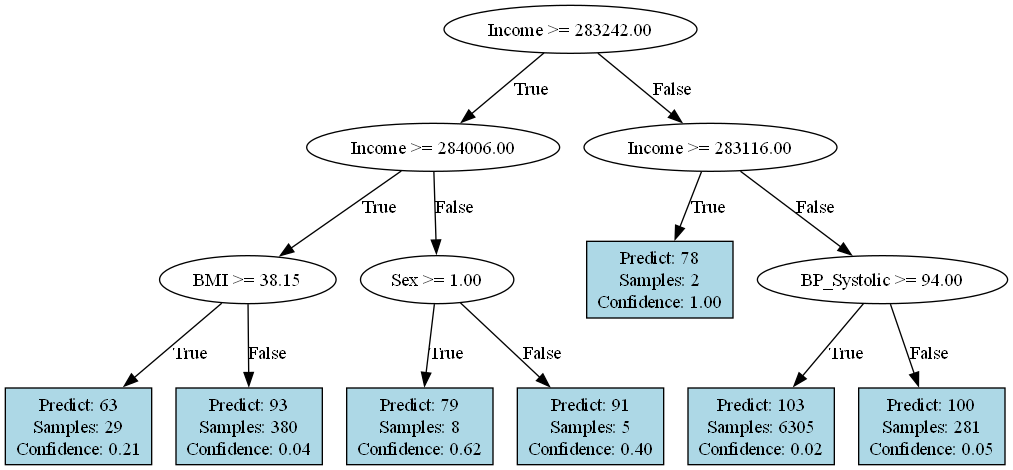

In [19]:
tree.feature_names = feature_names  # This is already known
dot, _ = tree.visualize_graphviz()
dot.render("tree", format="png", cleanup=True)  # Generates tree.png

Image(filename="tree.png")


In [22]:
import time

def load_and_prepare_data():

    # Convert to different formats for each implementation
    feature_names = list(data.columns[:-1])

    # For custom implementation (list of lists)
    X_custom = data.iloc[:, :-1].values.tolist()
    y_custom = data.iloc[:, -1].values.tolist()
    dataset_custom = [row + [label] for row, label in zip(X_custom, y_custom)]

    # For sklearn (numpy arrays)
    X_sklearn = data.iloc[:, :-1].values
    y_sklearn = data.iloc[:, -1].values

    return dataset_custom, X_sklearn, y_sklearn, feature_names

def compare_implementations(max_depth_values=[3, 5, 10], min_samples_leaf_values=[1, 5, 10]):
    """Compare custom implementation vs sklearn"""

    # Load data
    print("Loading heart attack prediction dataset...")
    dataset_custom, X_sklearn, y_sklearn, feature_names = load_and_prepare_data()

    # Split data
    train_custom, test_custom = train_test_split(dataset_custom, test_size=0.2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_sklearn, y_sklearn, test_size=0.2, random_state=42)

    print(f"Dataset shape: {X_sklearn.shape}")
    print(f"Training samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}")

    results = []

    print("\n" + "="*80)
    print("COMPARING IMPLEMENTATIONS")
    print("="*80)

    for max_depth in max_depth_values:
        for min_samples_leaf in min_samples_leaf_values:
            print(f"\nTesting: max_depth={max_depth}, min_samples_leaf={min_samples_leaf}")
            print("-" * 60)

            # Test Custom Implementation
            print("CUSTOM IMPLEMENTATION:")
            start_time = time.time()

            custom_tree = DecisionTree(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            custom_tree.fit(train_custom, feature_names)

            # Make predictions
            test_X_custom = [row[:-1] for row in test_custom]
            test_y_custom = [row[-1] for row in test_custom]
            custom_predictions = custom_tree.predict(test_X_custom)

            custom_train_time = time.time() - start_time
            custom_accuracy = accuracy_score(test_y_custom, custom_predictions)
            custom_stats = custom_tree.get_tree_stats()

            print(f"  Accuracy: {custom_accuracy:.4f}")
            print(f"  Training time: {custom_train_time:.4f}s")
            print(f"  Tree nodes: {custom_stats['total_nodes']}")
            print(f"  Tree depth: {custom_stats['max_depth']}")

            # Test Sklearn Implementation
            print("\nSKLEARN IMPLEMENTATION:")
            start_time = time.time()

            sklearn_tree = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=42,
                criterion='gini'
            )
            sklearn_tree.fit(X_train, y_train)
            sklearn_predictions = sklearn_tree.predict(X_test)

            sklearn_train_time = time.time() - start_time
            sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

            print(f"  Accuracy: {sklearn_accuracy:.4f}")
            print(f"  Training time: {sklearn_train_time:.4f}s")
            print(f"  Tree nodes: {sklearn_tree.tree_.node_count}")
            print(f"  Tree depth: {sklearn_tree.tree_.max_depth}")

            # Compare results
            accuracy_diff = abs(custom_accuracy - sklearn_accuracy)
            time_ratio = custom_train_time / sklearn_train_time if sklearn_train_time > 0 else float('inf')

            print(f"\nCOMPARISON:")
            print(f"  Accuracy difference: {accuracy_diff:.4f}")
            print(f"  Time ratio (custom/sklearn): {time_ratio:.2f}x")
            print(f"  {'Custom is faster' if time_ratio < 1 else 'Sklearn is faster'}")

            # Store results
            results.append({
                'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf,
                'custom_accuracy': custom_accuracy,
                'sklearn_accuracy': sklearn_accuracy,
                'custom_time': custom_train_time,
                'sklearn_time': sklearn_train_time,
                'custom_nodes': custom_stats['total_nodes'],
                'sklearn_nodes': sklearn_tree.tree_.node_count,
                'accuracy_diff': accuracy_diff,
                'time_ratio': time_ratio
            })

    return results

def visualize_comparison(results):
    """Create visualizations comparing the implementations"""

    df = pd.DataFrame(results)

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Accuracy comparison
    axes[0, 0].scatter(df['custom_accuracy'], df['sklearn_accuracy'], alpha=0.7, s=60)
    axes[0, 0].plot([0, 1], [0, 1], 'r--', alpha=0.5)  # Perfect agreement line
    axes[0, 0].set_xlabel('Custom Implementation Accuracy')
    axes[0, 0].set_ylabel('Sklearn Implementation Accuracy')
    axes[0, 0].set_title('Accuracy Comparison')
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Training time comparison
    axes[0, 1].scatter(df['custom_time'], df['sklearn_time'], alpha=0.7, s=60)
    axes[0, 1].set_xlabel('Custom Implementation Time (s)')
    axes[0, 1].set_ylabel('Sklearn Implementation Time (s)')
    axes[0, 1].set_title('Training Time Comparison')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_xscale('log')
    axes[0, 1].set_yscale('log')

    # 3. Tree size comparison
    axes[1, 0].scatter(df['custom_nodes'], df['sklearn_nodes'], alpha=0.7, s=60)
    axes[1, 0].plot([0, df[['custom_nodes', 'sklearn_nodes']].max().max()],
                    [0, df[['custom_nodes', 'sklearn_nodes']].max().max()], 'r--', alpha=0.5)
    axes[1, 0].set_xlabel('Custom Implementation Nodes')
    axes[1, 0].set_ylabel('Sklearn Implementation Nodes')
    axes[1, 0].set_title('Tree Size Comparison')
    axes[1, 0].grid(True, alpha=0.3)

    # 4. Performance summary
    param_combinations = [f"d{row['max_depth']}_s{row['min_samples_leaf']}" for _, row in df.iterrows()]
    x_pos = np.arange(len(param_combinations))

    width = 0.35
    axes[1, 1].bar(x_pos - width/2, df['custom_accuracy'], width, label='Custom', alpha=0.7)
    axes[1, 1].bar(x_pos + width/2, df['sklearn_accuracy'], width, label='Sklearn', alpha=0.7)
    axes[1, 1].set_xlabel('Parameter Combinations (depth_samples)')
    axes[1, 1].set_ylabel('Accuracy')
    axes[1, 1].set_title('Accuracy by Parameters')
    axes[1, 1].set_xticks(x_pos)
    axes[1, 1].set_xticklabels(param_combinations, rotation=45)
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def print_summary_stats(results):
    """Print summary statistics of the comparison"""
    df = pd.DataFrame(results)

    print("\n" + "="*80)
    print("SUMMARY STATISTICS")
    print("="*80)

    print(f"Number of configurations tested: {len(results)}")
    print(f"\nAccuracy Statistics:")
    print(f"  Custom - Mean: {df['custom_accuracy'].mean():.4f}, Std: {df['custom_accuracy'].std():.4f}")
    print(f"  Sklearn - Mean: {df['sklearn_accuracy'].mean():.4f}, Std: {df['sklearn_accuracy'].std():.4f}")
    print(f"  Mean absolute difference: {df['accuracy_diff'].mean():.4f}")

    print(f"\nTraining Time Statistics:")
    print(f"  Custom - Mean: {df['custom_time'].mean():.4f}s, Median: {df['custom_time'].median():.4f}s")
    print(f"  Sklearn - Mean: {df['sklearn_time'].mean():.4f}s, Median: {df['sklearn_time'].median():.4f}s")
    print(f"  Mean time ratio (custom/sklearn): {df['time_ratio'].mean():.2f}x")

    print(f"\nTree Size Statistics:")
    print(f"  Custom - Mean nodes: {df['custom_nodes'].mean():.1f}")
    print(f"  Sklearn - Mean nodes: {df['sklearn_nodes'].mean():.1f}")

    # Best and worst cases
    best_custom = df.loc[df['custom_accuracy'].idxmax()]
    best_sklearn = df.loc[df['sklearn_accuracy'].idxmax()]

    print(f"\nBest Performance:")
    print(f"  Custom: {best_custom['custom_accuracy']:.4f} (depth={best_custom['max_depth']}, samples={best_custom['min_samples_leaf']})")
    print(f"  Sklearn: {best_sklearn['sklearn_accuracy']:.4f} (depth={best_sklearn['max_depth']}, samples={best_sklearn['min_samples_leaf']})")


# Run comparison with different parameter combinations
results = compare_implementations(
    max_depth_values=[3, 5, 10, 15],
    min_samples_leaf_values=[1, 5, 10, 20]
)

# Print summary statistics
print_summary_stats(results)

# Create visualizations
visualize_comparison(results)

# Optional: Save results to CSV for further analysis
df_results = pd.DataFrame(results)
df_results.to_csv('decision_tree_comparison.csv', index=False)
print(f"\nResults saved to 'decision_tree_comparison.csv'")


Loading heart attack prediction dataset...
Dataset shape: (8763, 22)
Training samples: 7010
Testing samples: 1753

COMPARING IMPLEMENTATIONS

Testing: max_depth=3, min_samples_leaf=1
------------------------------------------------------------
CUSTOM IMPLEMENTATION:


KeyboardInterrupt: 

now, we will implement Random Forest, that will use in our Decision Tree.

In [21]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_leaf=1, max_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.trees = []

    #function from ChatGPT - randomize the features based on max_features parameter

    def select_features(self,n_features):
        if self.max_features is None:
            return random.sample(range(n_features),int(np.sqrt(n_features)))
        elif isinstance(self.max_features, int):
            return random.sample(range(n_features),self.max_features)
        elif isinstance(self.max_features, float):
            return random.sample(range(n_features),int(self.max_features*n_features))
        else:
            raise ValueError("Invalid max_features value")

    def fit(self,rows):
        n_features = len(rows[0]) - 1
        self.trees = []
        for i in range(self.n_trees):
            sample = [random.choice(data) for _ in range(len(data))] #randomize the sample
            feature = self.select_features(n_features) #randomize the features
            tree = DecisionTree(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf,features=feature)
            tree.fit(sample)
            self.trees.append(tree)

    def predict(self,samples):
        predictions = [tree.predict(samples) for tree in self.trees]
        final_predictions = []
        for i in range(len(samples)):
            votes = [predictions[i][j] for j in range(self.n_trees)]
            most_common_vote = Counter(votes).most_common(1)[0][0]
            final_predictions.append(most_common_vote)
        return final_predictions

    def predict_proba(self, samples): #helper function
        """Return average class probabilities from all trees."""
        all_probas = [tree.predict_proba(samples) for tree in self.trees]
        final_probas = []

        for i in range(len(samples)):
            combined = Counter()
            for t in range(self.n_trees):
                combined += all_probas[t][i]
            total = sum(combined.values())
            probas = {label: count / total for label, count in combined.items()}
            final_probas.append(probas)

        return final_probas





now, we will implement Adaboost algorithm:

In [22]:
class Adaboost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.learners = []
        self.alphas = []

        # the adaboost algorithm should build a strong learner from the weak ones, like this:
        # h = sign (a^1h1 + a^2h2 + a^3h3 + ..... + a^nhn etc.)
    def fit(self, rows):
        n = len(rows)
        weights = np.ones(n) / n #in the first iteration, all the weight are equal
        self.learners = []
        self.alphas = []
        for i in range(self.n_estimators):
            indices = np.random.choice(n, size=n,replace=True,p=weights)
            sample = [rows[j] for j in indices]
            #build weak learner:
            stump = DecisionTree(max_depth=1)
            stump.fit(sample)

            #now, we will compute the error:
            predict = stump.predict(rows)
            y_true = [row[-1] for row in rows] # y_true is 1 or -1
            error = sum([weights[i] for i in range(n) if predict[i] != y_true[i]])
            error = max(1e-10, error) #1e-10 is little epsilon, because we dont want to divide by 0 if there is no error.
            if error > 0.5: #worse than guessing
                continue

            alpha = 0.5 * np.log((1 - error) / error)
            #now we will update the weights based on the alphas:
            for i in range(n):
                if predict[i] == y_true[i]:
                    weights[i] = weights[i] * np.exp(-alpha) #the guess is true, so we decrease the weight.
                else:
                    weights[i] = weights[i] * np.exp(alpha) #the guess is wrong, so we increase the weight.
            weights = weights / sum(weights) #normalize the vector of weights

            #we will keep this stump and alpha, in order to create a strong learner.
            self.learners.append(stump)
            self.alphas.append(alpha)

    def predict(self, samples):
        scores = np.zeros(len(samples)) #vector of scores, all the samples are zero
        for stump, alpha in zip(self.learners, self.alphas):
            predict = stump.predict(samples)
            predict = np.array(1 if p==1 else -1 for p in predict)
            scores += alpha * predict
            return [1 if score>0 else -1 for score in scores]

    #helper function from ChatGPT:
    def predict_proba(self, samples):
        """Optional: Return a probability-like score from the weighted votes."""
        final_scores = np.zeros(len(samples))
        for stump, alpha in zip(self.learners, self.alphas):
            preds = stump.predict(samples)
            preds = np.array([1 if p == 1 else -1 for p in preds])
            final_scores += alpha * preds

        # Sigmoid to normalize scores to probabilities
        probs = 1 / (1 + np.exp(-2 * final_scores))
        return [{'0': 1 - p, '1': p} for p in probs]